In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import pretty print
from pprint import pprint

In [2]:
# read the data 
df = pd.read_csv('data.csv',encoding='latin-1')

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [3]:
# create a df object with Country vs Responses Count 
df_country = df.groupby('Country').size().reset_index(name='Count')
# sort the df by count
df_country = df_country.sort_values(by=['Count'], ascending=False)
df10 = df_country.head(10)
print(df10)

       Country  Count
54     Finland  22933
55      France  13475
42     Denmark  10891
104     Mexico   9169
94   Lithuania   8255
6    Argentina   5923
78       Japan   5072
23    Bulgaria   4785
128     Poland   3088
153     Sweden   3055


### Plot of Number of Countries vs Number of Responses

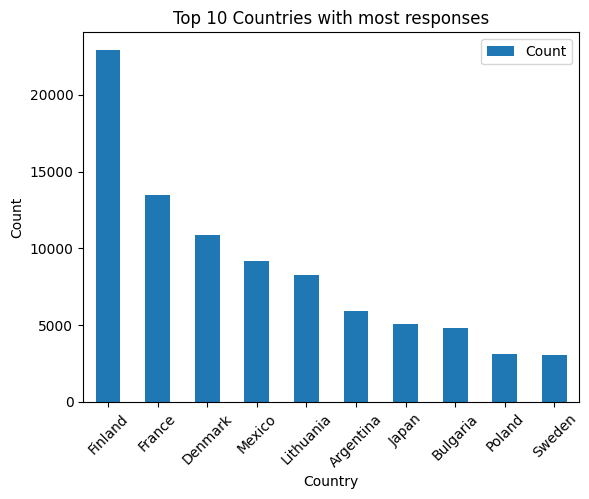

In [4]:
# plot the bar chart
df10.plot.bar(x='Country', y='Count', rot=0)
plt.title('Top 10 Countries with most responses')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()



In [5]:
# get the unique value  in gender column
genders = df['Dem_gender'].unique()
genders

array(['Female', 'Male', 'Other/would rather not say', nan], dtype=object)

In [6]:
#  get gender wise count
countries = df10['Country'].tolist()
Male = []
Female = []
Nan = []
Other = []
# get count of the Dem_gender column for each country
for country in countries:
    df_country = df[df['Country'] == country]
    l = len(df_country)
    # print(l)
    # group df_country by genders
    males = df_country[df_country['Dem_gender']=="Male"]
    Male.append(males.count()[0])
    l-=males.count()[0]
    females = df_country[df_country['Dem_gender']=="Female"]
    Female.append(females.count()[0])
    l-=females.count()[0]
    others = df_country[df_country['Dem_gender'] == "Other/would rather not say"]
    Other.append(others.count()[0])
    l-=others.count()[0]
    nn = df_country[df_country['Dem_gender'] == "nan"]
    Nan.append(l)

# create a df object with Country vs Responses Count
d = {
    'Country':countries,'Male':Male,'Female':Female,'Others':Other,'nan':Nan
}
genderdf =   pd.DataFrame(data = d)
genderdf



,Country,Male,Female,Others,nan
0,Finland,3832,18645,416,40
1,France,6356,6876,211,32
2,Denmark,2299,8527,42,23
3,Mexico,2476,6600,51,42
4,Lithuania,1995,6203,50,7
5,Argentina,897,4955,60,11
6,Japan,2745,2256,67,4
7,Bulgaria,821,3863,91,10
8,Poland,387,2676,25,0
9,Sweden,713,2307,30,5


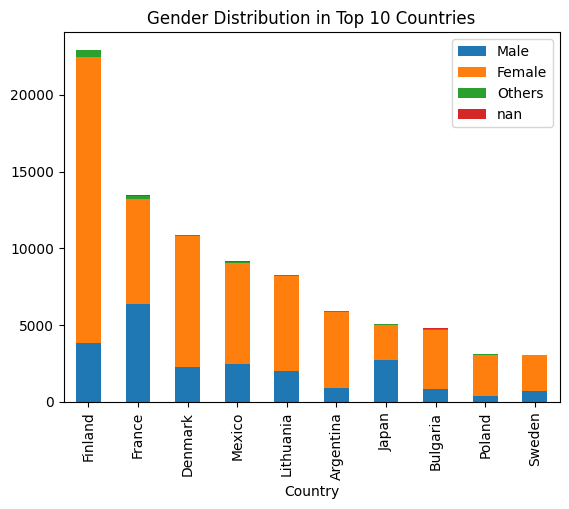

In [7]:
genderdf.plot(x='Country', kind='bar', stacked=True,
        title='Gender Distribution in Top 10 Countries')
plt.show()

In [8]:
# for country in countries:
    # df_country = df[df['Country'] == country]
educations = df['Dem_edu'].unique()
print(educations)

# initialize the list 2d 
a = [] # elementary school
b = [] # high school
c = [] # college or PhD

for country in countries:
    df_country = df[df['Country'] == country]
    l = len(df_country)
    # print(df_country)
    # get the count of each education level
   
  
    bc = df_country[df_country['Dem_edu'] == 'Up to 12 years of school'].count()[0]
    bc += df_country[df_country['Dem_edu'] == 'Up to 9 years of school'].count()[0]
    bc += df_country[df_country['Dem_edu'] == 'College degree'].count()[0]
    bc += df_country[df_country['Dem_edu'] == 'Some College, short continuing education or equivalent'].count()[0]
 
    b.append(bc)
    l-=bc
    cc = df_country[df_country['Dem_edu'] == 'bachelor'].count()[0]
    cc += df_country[df_country['Dem_edu'] == 'master'].count()[0]
    cc += df_country[df_country['Dem_edu'] == 'PhD/Doctorate'].count()[0]
    c.append(cc)
    l-=cc
    a.append(l)

d = {
    'Country':countries,'Elementary':a,'High School':b,'PhD/Doctorate':c
}
educationdf =   pd.DataFrame(data = d)
educationdf
    

['College degree, bachelor, master'
 'Some College, short continuing education or equivalent'
 'Up to 12 years of school' 'Up to 9 years of school' 'PhD/Doctorate' nan
 'None' 'Up to 6 years of school' 'Uninformative response']


,Country,Elementary,High School,PhD/Doctorate
0,Finland,13422,8571,940
1,France,8089,4061,1325
2,Denmark,4153,6372,366
3,Mexico,5025,1389,2755
4,Lithuania,6372,1455,428
5,Argentina,1860,3574,489
6,Japan,2924,2017,131
7,Bulgaria,2956,1602,227
8,Poland,1723,1207,158
9,Sweden,1707,1105,243


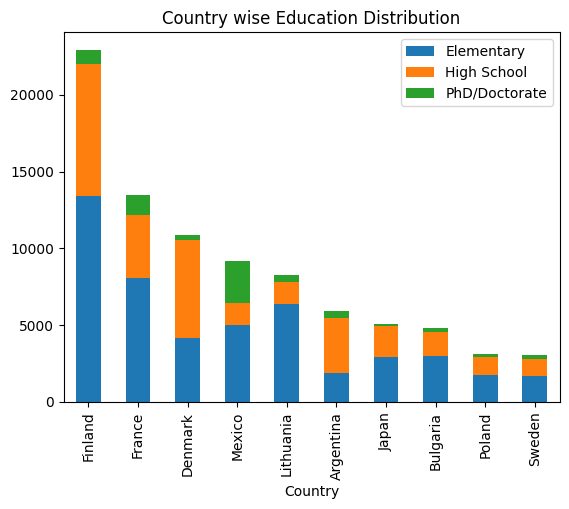

In [9]:
educationdf.plot(x='Country', kind='bar', stacked=True,
        title='Country wise Education Distribution')
plt.show()

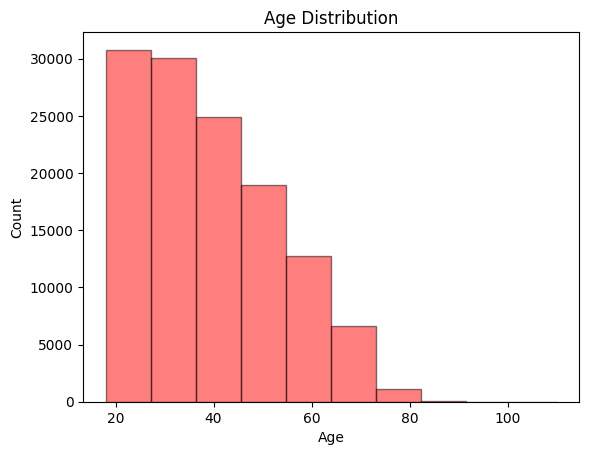

In [10]:
# generate plots to visualize the data
# age distribution
df['Dem_age'].plot.hist(bins=10, alpha=0.5, title='Age Distribution', color='red', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Number of Responses:  22933
58.0 392.0


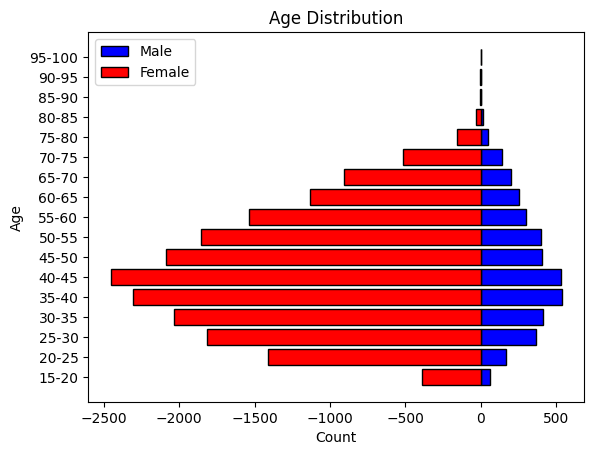

In [11]:
l  = [15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95]
r = [20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

def plot_age_distribution(df, country):
   
    m = np.zeros(len(l))
    f = np.zeros(len(l))

    df_country = df[df['Country'] == country]
    print("Number of Responses: ", len(df_country))
    # add the count for each age-group l-r
    ll = len(df_country)
    for i in range(len(l)):
        males = df_country[df_country['Dem_gender']=='Male']
        count = males[males['Dem_age'].between(l[i], r[i],inclusive="left")].count()[0]
        # count+= males[males['Dem_age'] == l[i]].count()[0]
        m[i] = count
        ll-=count
        females = df_country[df_country['Dem_gender']=='Female']
        count = females[females['Dem_age'].between(l[i], r[i],inclusive="left")].count()[0]
        # count+= females[females['Dem_age'] == l[i]].count()[0]
        f[i] = count
        ll-=count
    # print(ll) 
    return m,f

m,f = plot_age_distribution(df, 'Finland')
print(m[0],f[0])

age_range = np.array([])
for i in range(len(l)):
    xD = str(l[i]) + '-' + str(r[i])
    age_range = np.append(age_range, xD)
# plot the pyramid chart
plt.barh(age_range, m, color='blue', edgecolor='black',label='Male')
plt.barh(age_range, -f, color='red', edgecolor='black',label = 'Female')
# make x axis labels all positive
# plot mod to make x axis labels all positive
plt.title('Age Distribution')
plt.xlabel('Count')
plt.ylabel('Age')
plt.legend()
plt.show()